In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [4]:
# Import Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
#Checking Contents of Google Drive
!ls "/content/gdrive/My Drive/Springboard Projects/Capstone_Three"

Capstone_Three_Modelling_1	  Experiments.csv   group_2  group_5  models
Capstone_Three_Modelling_2	  extracted_images  group_3  group_6
Capstone_Three_Models_Assessment  group_1	    group_4  group_7


In [6]:
df = pd.read_csv('/content/gdrive/My Drive/Springboard Projects/Capstone_Three/models/accuracies_1.csv', index_col=0)
df.head()

,architecture,model_num,group,optimizer,learning_rate,valid_accuracy,test_accuracy
0,arch_1,model_1,group_1,SGD,0.001,0.886139,0.866379
1,arch_1,model_1,group_1,SGD,0.010,0.886139,0.852371
2,arch_1,model_1,group_1,Adam,0.001,0.876238,0.867457
3,arch_1,model_1,group_1,Adam,0.010,0.846535,0.832974
4,arch_1,model_2,group_1,SGD,0.001,0.905941,0.855603


In [8]:
# Finding Best Model for each group
best_model_id = dict()
for group in ['group_1', 'group_2', 'group_3']:
  id = df[df['group']==group]['valid_accuracy'].argmax()
  best_model_id[group] = id
  print('Best Model for ' + group +' is: ' + df.loc[id]['architecture'] + '_' + df.loc[id]['model_num']
                                          + '_' + df.loc[id]['optimizer'] + '_' + str(df.loc[id]['learning_rate'])
                                          + ' with validation accuracy as ' + str(round(df.loc[id]['valid_accuracy']*100, 2)) + '%'
                                          + ' and test accuracy as ' + str(round(df.loc[id]['test_accuracy']*100, 2)) + '%')

Best Model for group_1 is: arch_3_model_3_SGD_0.01 with validation accuracy as 93.56% and test accuracy as 88.58%
Best Model for group_2 is: arch_3_model_3_SGD_0.001 with validation accuracy as 88.61% and test accuracy as 91.16%
Best Model for group_3 is: arch_3_model_3_Adam_0.001 with validation accuracy as 92.57% and test accuracy as 91.27%


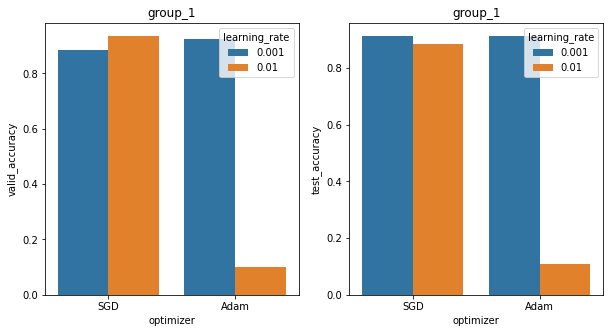

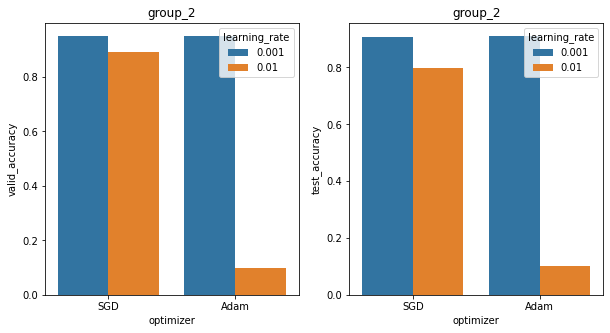

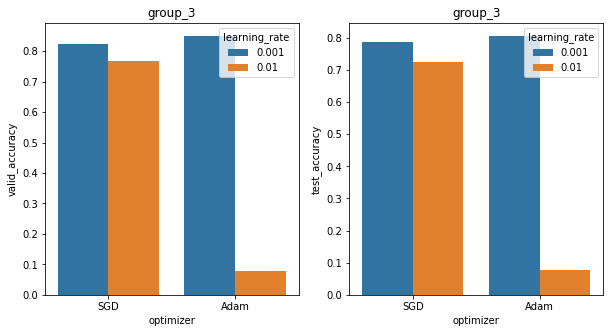

In [9]:
# Lets see how the optimizers and learning rate affect the validation and test accuracy for the best model
for group in ['group_1', 'group_2', 'group_3']:
  id = best_model_id[group]
  arch = df.loc[id]['architecture']
  modelnum = df.loc[id]['model_num']
  plt.subplots(figsize=(10,5))
  plt.subplot(1,2,1)
  sns.barplot(x='optimizer', y='valid_accuracy', hue='learning_rate', data=df[(df['architecture']==arch)&(df['model_num']==modelnum)&(df['group']==group)])
  plt.title(group)
  plt.subplot(1,2,2)
  sns.barplot(x='optimizer', y='test_accuracy', hue='learning_rate', data=df[(df['architecture']==arch)&(df['model_num']==modelnum)&(df['group']==group)])
  plt.title(group)
  plt.show()

### **Missclassified Images in each Group**

In [10]:
def print_missclassification(test_data, y_pred):
  miss_id = np.where(test_data.classes != y_pred)
  label_dict = dict()
  for k, v in test_data.class_indices.items():
      label_dict[v] = k
  for i in range(0,5):
    print
    image = plt.imread(test_data.directory + '/' + test_data.filenames[miss_id[0][i]])
    plt.subplots(figsize=(2,2))
    plt.imshow(image, cmap='gray')
    plt.show()
    print('Actual Sumbol: ' + label_dict[test_data.classes[miss_id[0][i]]])
    print('Predicted Symbol: ' + label_dict[y_pred[miss_id[0][i]]])

Found 928 images belonging to 11 classes.
arch_3_model_3_opt_SGD_lr_0.01_group_1
29/29 [==============================] - 186s 7s/step - loss: 0.5499 - accuracy: 0.8858


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


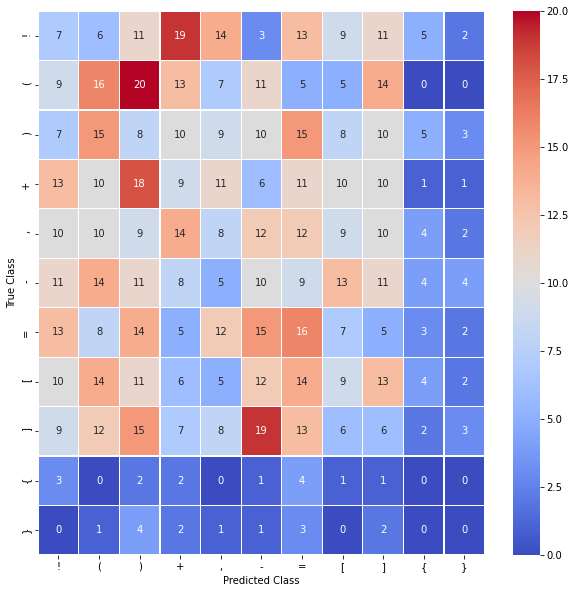

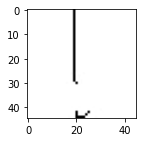

Actual Sumbol: !
Predicted Symbol: {


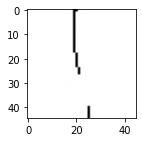

Actual Sumbol: !
Predicted Symbol: ,


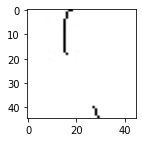

Actual Sumbol: !
Predicted Symbol: +


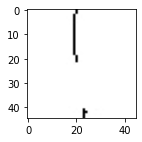

Actual Sumbol: !
Predicted Symbol: +


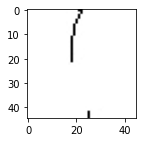

Actual Sumbol: !
Predicted Symbol: =
Found 1000 images belonging to 10 classes.
arch_3_model_3_opt_SGD_lr_0.001_group_2
32/32 [==============================] - 250s 8s/step - loss: 0.3130 - accuracy: 0.9060


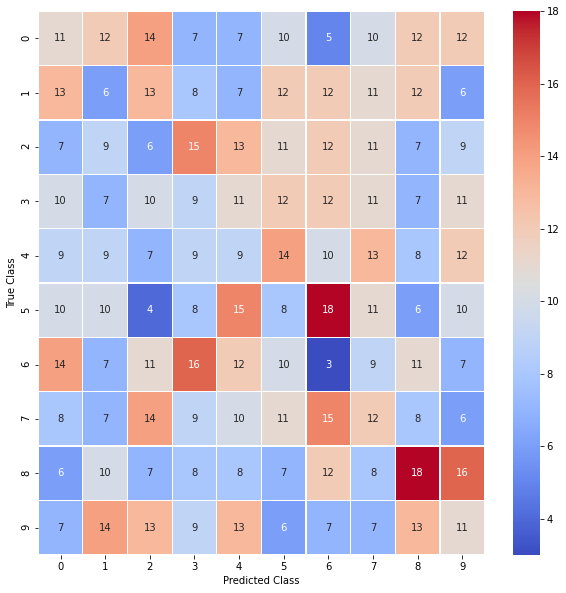

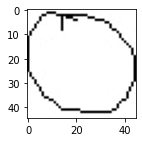

Actual Sumbol: 0
Predicted Symbol: 7


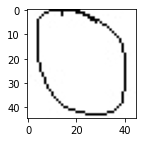

Actual Sumbol: 0
Predicted Symbol: 4


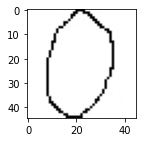

Actual Sumbol: 0
Predicted Symbol: 1


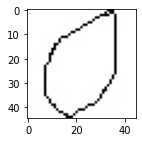

Actual Sumbol: 0
Predicted Symbol: 1


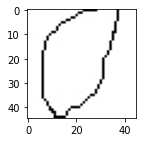

Actual Sumbol: 0
Predicted Symbol: 2
Found 1300 images belonging to 13 classes.
arch_3_model_3_opt_Adam_lr_0.001_group_3
41/41 [==============================] - 317s 8s/step - loss: 0.6833 - accuracy: 0.8062


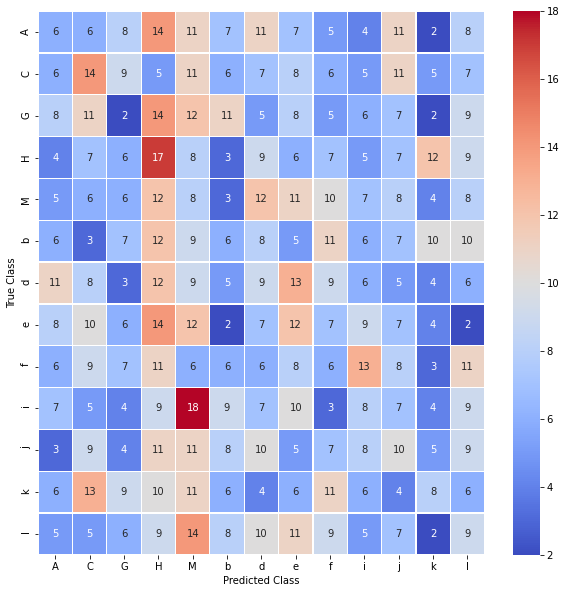

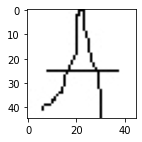

Actual Sumbol: A
Predicted Symbol: d


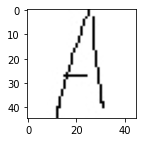

Actual Sumbol: A
Predicted Symbol: l


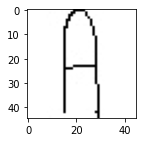

Actual Sumbol: A
Predicted Symbol: d


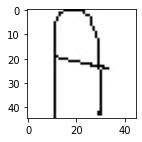

Actual Sumbol: A
Predicted Symbol: l


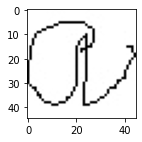

Actual Sumbol: A
Predicted Symbol: G


In [11]:
for group in ['group_1', 'group_2', 'group_3']:
  id = best_model_id[group]
  tf.keras.backend.clear_session()
  model = tf.keras.models.load_model('/content/gdrive/My Drive/Springboard Projects/Capstone_Three/models/'+df.loc[id]['architecture'] + '_' + df.loc[id]['model_num']
                                          + '_opt_' + df.loc[id]['optimizer'] + '_lr_' + str(df.loc[id]['learning_rate']) + '_' + group + '.hf5')
  test_img_data_gen = ImageDataGenerator(rescale=1/255)
  test_data = test_img_data_gen.flow_from_directory(('/content/gdrive/My Drive/Springboard Projects/Capstone_Three/'+group+'/test'), 
                                                    target_size=(45,45),
                                                    color_mode='grayscale', 
                                                    batch_size=32,  
                                                    class_mode='categorical')
  print(df.loc[id]['architecture'] + '_' + df.loc[id]['model_num'] + '_opt_' + df.loc[id]['optimizer'] + '_lr_' + str(df.loc[id]['learning_rate']) + '_' + group)
  model.evaluate(test_data)
  y_pred = model.predict_classes(test_data)
  _ = plt.subplots(figsize= (10,10))
  _ = sns.heatmap(confusion_matrix(test_data.classes, y_pred), 
            annot=True, fmt='d', xticklabels=test_data.class_indices, yticklabels=test_data.class_indices, cmap='coolwarm', linewidths=0.2)
  plt.ylabel('True Class')
  plt.xlabel('Predicted Class')
  plt.show()
  print_missclassification(test_data, y_pred)